In [46]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv('Student_Performance.csv')

# Drop duplicate values

In [8]:
df = df.drop_duplicates()

In [11]:
df.head(10)
df.tail(10)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
9990,9,43,No,7,4,40.0
9991,5,97,Yes,7,4,83.0
9992,9,52,No,9,7,50.0
9993,9,58,Yes,7,7,55.0
9994,6,46,Yes,8,0,39.0
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0
9999,7,74,No,8,1,64.0


# Drop null values

In [12]:
df = df.dropna()

# Number of rows and column

In [13]:
df.shape

(9873, 6)

# Column Renaming

In [26]:
df = df.rename(columns = {"Hours Studied" : "Hours_Studied", "Previous Scores" : "Previous_Scores",	"Co-curricular Activities" : "Extracurricular_Activities", "Sleep Hours" : "Sleep_Hours", "Sample Question Papers Practiced" : "Sample_Question_Papers_Practiced",	"Performance Index" : "Performance_Index" })
df.head(5)

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [27]:
from sklearn.preprocessing import LabelEncoder
ls = LabelEncoder()
df.Extracurricular_Activities = ls.fit_transform(df.Extracurricular_Activities)

In [28]:
df

,Hours_Studied,Previous_Scores,Extracurricular_Activities,Sleep_Hours,Sample_Question_Papers_Practiced,Performance_Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,1,4,2,23.0
9996,7,64,1,8,5,58.0
9997,6,83,1,8,5,74.0
9998,9,97,1,7,0,95.0


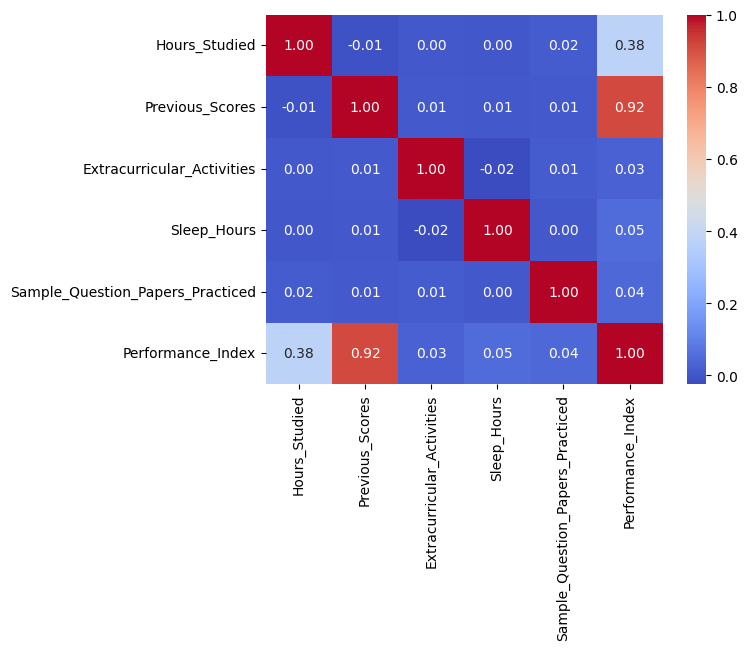

In [30]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True, cmap="coolwarm", fmt= ".2f")
plt.show()

In [84]:
x = df['Previous_Scores']
y = df['Performance_Index']

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [87]:
from sklearn.linear_model import LinearRegression

In [88]:
lr = LinearRegression()

In [89]:
# x_train= x_train.values.reshape(-1,1)
# y_train =y_train.values.reshape(-1,1)

In [90]:
# x_test = x_test.values.reshape(-1,1)

In [91]:
# lr.fit(x_train, y_train)

In [95]:
lr.fit(x_train.values.reshape(-1,1),y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [96]:
y_pred = lr.predict(x_test.values.reshape(-1,1))

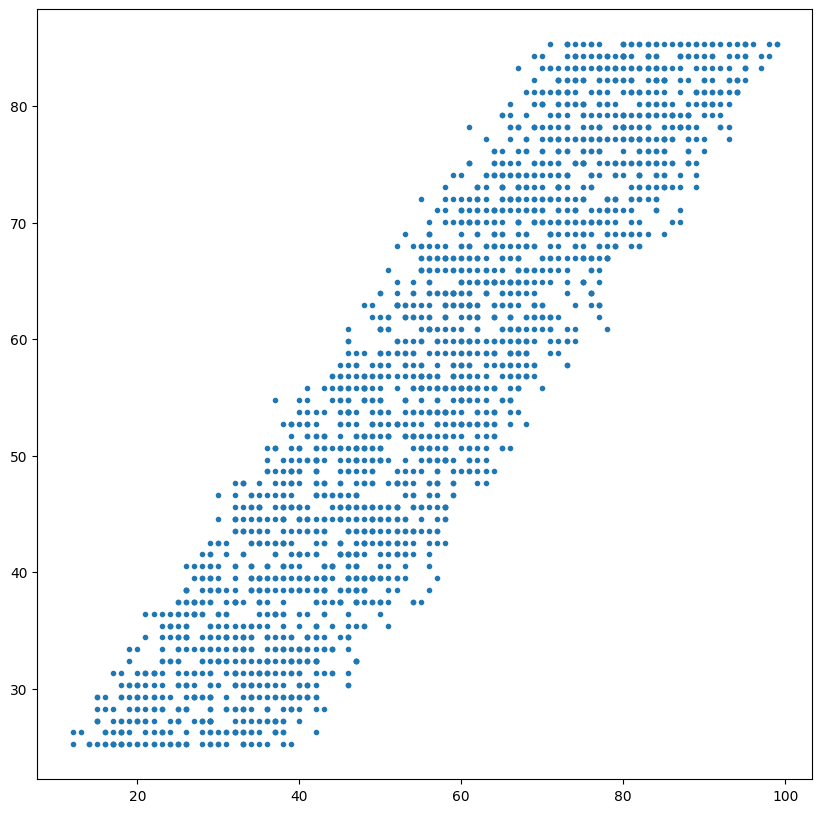

In [98]:
plt.figure(figsize=(10,10))
plt.scatter(y_test,y_pred,marker='.')
plt.show()